O código visa treinar um modelo de aprendizado de máquina usando um Banco de Dados que contém 150 espécimes de flores divididos em 3 classes diferentes de Íris (com suas características de Pétala e Sépala). O treinamento do modelo utiliza o algoritmo Naive Bayes e tem como objetivo prever a qual das classes determinada flor pertence.

The code aims to train a machine learning model using a Database which contains 150 flower specimens divided in 3 different classes of Iris (by its Petal and Sepal features). The training of the model uses the Naive Bayes algorithm and its target is to predict from which of the classes the determined flower belongs.

Importando as bibliotecas:

Importing the libraries:


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score



Carregando a Base de Dados:

Loading the Database:


In [3]:

data = pd.read_csv('iris.csv', 
 names=["Sepal Length (cm)", "Sepal Width (cm)", "Petal Length (cm)", "Petal Width (cm)", "Class"])
 


Separando a base de dados em alvo (as classes) e os preditores (os parâmetros):

Splitting the database into targets (the classes) and predictors (the features):


In [4]:

target = data.iloc[:,4]
predictors = data.iloc[:,0:4]



A classe precisa ser rotulada em valores numéricos:

The class need to be labelled into numeric values:


In [5]:

labeler = LabelEncoder()
target = labeler.fit_transform(target)



O alvo e os preditores são separados nos dados de treinamento e de teste (tamanho do teste = 33%):

The target and the predictors are both separated in training and testing data (test size = 33%):


In [6]:

predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.33)



O algoritmo Gaussiano do Naive Bayes é importado, no qual os dados de treinamento são aplicados:

The Naive Bayes Gaussian algorithm is imported, in which the training data (predictors and target) is applied:


In [7]:

classifier = GaussianNB()
classifier.fit(predictors_train, target_train)


GaussianNB()

Para medir a precisão do modelo, é necessário comparar as previsões feitas por ele, usando o predictors_test, e compará-lo com o target_test:

In order to measure how accurate the model is, it needed to compare the predictions made by it, using the predictors_test, and compare it with the target_test:

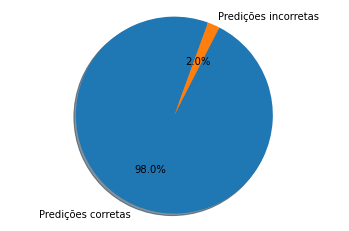

In [8]:

predictions = classifier.predict(predictors_test)
accuracy = accuracy_score(target_test, predictions)
labels = 'Predições corretas', 'Predições incorretas'
sizes = [accuracy, 1-accuracy] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=70, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()


A precisão do modelo é por volta de 98,00%.

The accuracy of the model is about 98,00%.